In [52]:
import os
import json
from tqdm import tqdm

def convert_imcoords_to_bbox(imcoords):
    # imcoords는 문자열 형태의 좌표를 파싱하여 리스트로 변환
    coords = list(map(float, imcoords.split(',')))
    x_values = coords[0::2]  # 짝수 인덱스는 x 좌표
    y_values = coords[1::2]  # 홀수 인덱스는 y 좌표
    
    # 좌표로부터 bbox의 중심 좌표(cx, cy), 너비(width), 높이(height) 계산
    x_min = min(x_values)
    x_max = max(x_values)
    y_min = min(y_values)
    y_max = max(y_values)
    
    cx = (x_min + x_max) / 2
    cy = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    
    return cx, cy, width, height

def filter_and_modify_json(directory, output_directory):
    # 지정된 디렉토리 내 모든 JSON 파일 확인
    for filename in tqdm(os.listdir(directory), desc="Processing files", unit="file"):
        if filename.endswith(".json"):
            input_file_path = os.path.join(directory, filename).replace('\\', '/')
            
            with open(input_file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
            
            # 새로운 피처 저장 리스트
            filtered_features = []

            # 'features' 필드가 있는지 확인하고 반복
            if 'features' in data:
                for feature in data['features']:
                    if 'properties' in feature:
                        type_name = feature['properties'].get('type_name')
                        
                        # 'type_name'이 'ship(S)' 또는 'ship(L)'인 경우만 처리
                        if type_name in ['ship(S)', 'ship(L)']:
                            imcoords = feature['properties'].get('object_imcoords')
                            if imcoords:
                                # 좌표 변환 후 새로운 값 추가
                                cx, cy, width, height = convert_imcoords_to_bbox(imcoords)
                                feature['properties']['cx'] = cx
                                feature['properties']['cy'] = cy
                                feature['properties']['width'] = width
                                feature['properties']['height'] = height
                                
                                # 기존 데이터와 함께 새로운 properties로 업데이트
                                filtered_features.append(feature)

            # 새로운 JSON 구조 생성
            if filtered_features:
                new_data = {
                    "type": "FeatureCollection",
                    "features": filtered_features
                }

                # 출력 경로 설정 (출력 폴더에 저장)
                output_file_path = os.path.join(output_directory, filename).replace('\\', '/')
                with open(output_file_path, 'w', encoding='utf-8') as outfile:
                    json.dump(new_data, outfile, ensure_ascii=False, indent=4)
import os
import json

def check_for_other_classes(directory):
    other_classes_found = False
    other_classes = set()

    # 지정된 디렉토리 내 모든 JSON 파일 확인
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename).replace('\\', '/')
            
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)
            
            # 'features' 필드가 있는지 확인하고 반복
            if 'features' in data:
                for feature in data['features']:
                    if 'properties' in feature:
                        type_name = feature['properties'].get('type_name')
                        
                        # 'ship(S)' 또는 'ship(L)' 외의 다른 클래스가 있는지 확인
                        if type_name not in ['ship(S)', 'ship(L)']:
                            other_classes_found = True
                            other_classes.add(type_name)

    # 결과 출력
    if other_classes_found:
        print("다른 클래스가 발견되었습니다:", other_classes)
    else:
        print("모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.")

In [53]:
# 사용 예시
input_directory = 'train_objects_labels'  # 입력 JSON 파일들이 있는 폴더
output_directory = './train/label'  # 필터링 후 JSON 파일을 저장할 폴더

# 출력 폴더가 없으면 생성
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 필터링 및 변환 실행
filter_and_modify_json(input_directory, output_directory)
check_for_other_classes(output_directory)

Processing files: 100%|██████████| 1747/1747 [00:05<00:00, 319.09file/s]


모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.


In [54]:

# 사용 예시
input_directory = 'vaildate_objects_labels'  # 입력 JSON 파일들이 있는 폴더
output_directory = './valid/label'  # 필터링 후 JSON 파일을 저장할 폴더

# 출력 폴더가 없으면 생성
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 필터링 및 변환 실행
filter_and_modify_json(input_directory, output_directory)
check_for_other_classes(output_directory)

Processing files: 100%|██████████| 219/219 [00:00<00:00, 358.50file/s]


모든 JSON 파일이 'ship(S)' 또는 'ship(L)'만 포함하고 있습니다.


In [55]:
train_list = os.listdir('train/label')
train_list.sort()
train_list

['OBJ00022_PS3_K3_NIA0078.json',
 'OBJ00028_PS3_K3_NIA0078.json',
 'OBJ00258_PS3_K3_NIA0081.json',
 'OBJ00261_PS3_K3_NIA0081.json',
 'OBJ00607_PS3_K3_NIA0086.json',
 'OBJ01399_PS3_K3_NIA0093.json',
 'OBJ01400_PS3_K3_NIA0093.json',
 'OBJ01505_PS3_K3_NIA0095.json',
 'OBJ01589_PS3_K3_NIA0097.json',
 'OBJ01654_PS3_K3_NIA0101.json',
 'OBJ01675_PS3_K3_NIA0102.json',
 'OBJ01691_PS3_K3_NIA0102.json',
 'OBJ01696_PS3_K3_NIA0102.json',
 'OBJ01701_PS3_K3_NIA0102.json',
 'OBJ01735_PS3_K3_NIA0104.json',
 'OBJ01937_PS3_K3_NIA0110.json',
 'OBJ02050_PS3_K3_NIA0112.json',
 'OBJ02293_PS3_K3_NIA0118.json',
 'OBJ02297_PS3_K3_NIA0118.json',
 'OBJ02307_PS3_K3_NIA0118.json',
 'OBJ02311_PS3_K3_NIA0118.json',
 'OBJ02314_PS3_K3_NIA0118.json',
 'OBJ02400_PS3_K3_NIA0121.json',
 'OBJ02409_PS3_K3_NIA0121.json',
 'OBJ02417_PS3_K3_NIA0121.json',
 'OBJ02634_PS3_K3_NIA0126.json',
 'OBJ02635_PS3_K3_NIA0126.json',
 'OBJ02721_PS3_K3_NIA0126.json',
 'OBJ02723_PS3_K3_NIA0126.json',
 'OBJ02797_PS3_K3_NIA0126.json',
 'OBJ03271

In [56]:
import os
import shutil
from tqdm import tqdm
import csv

# .json 파일을 기반으로 .png 파일을 찾고, 해당 파일을 바로 복사하는 함수
def get_and_copy_img(json_path, img_path, save_dir):
    # save_dir이 없으면 디렉토리 생성
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # .json 파일을 기반으로 .png 파일을 찾아서 복사
    for filename in tqdm(os.listdir(json_path), desc="Processing files", unit="file"):
        # .json 파일명을 .png 파일명으로 변환
        png_file = filename.replace('.json', '.png')
        png_file = os.path.join(img_path, png_file).replace('\\', '/')
        
        # .png 파일이 존재하는지 확인하고, 존재하면 복사
        if os.path.exists(png_file):
            shutil.copy(png_file, save_dir)
        else:
            print(f"Warning: {png_file} not found!")

In [57]:
# 사용 예시
json_train_dir = 'train/label'  # .json 파일들이 있는 디렉토리
img_train_dir = 'train_objects_images'  # .png 파일들이 있는 디렉토리
save_dir = './train/img'  # .png 파일을 복사할 디렉토리

# .json 파일을 기반으로 .png 파일을 찾고 바로 복사
get_and_copy_img(json_train_dir, img_train_dir, save_dir)

Processing files: 100%|██████████| 357/357 [00:00<00:00, 540.74file/s]


In [58]:
# 사용 예시
json_train_dir = 'valid/label'  # .json 파일들이 있는 디렉토리
img_train_dir = 'vaildate_objects_images'  # .png 파일들이 있는 디렉토리
save_dir = './valid/img'  # .png 파일을 복사할 디렉토리

# .json 파일을 기반으로 .png 파일을 찾고 바로 복사
get_and_copy_img(json_train_dir, img_train_dir, save_dir)

Processing files: 100%|██████████| 37/37 [00:00<00:00, 557.60file/s]


In [59]:
# .json 파일과 .png 파일 경로를 리스트로 반환하는 함수
def get_img_json_list(json_path, img_path):
    img_json_list = []
    for filename in tqdm(os.listdir(json_path), desc="Processing files", unit="file"):
        # .json 파일명을 .png 파일명으로 변환
        json_file = os.path.join(json_path, filename).replace('\\', '/')
        png_file = filename.replace('.json', '.png')
        png_file = os.path.join(img_path, png_file).replace('\\', '/')

        # .png 파일이 실제로 존재하는지 확인 후 리스트에 추가
        if os.path.exists(png_file):
            img_json_list.append([png_file, json_file])
        else:
            print(f"Warning: {png_file} not found!")

    return img_json_list

# 추출된 경로 리스트를 CSV 파일로 저장하는 함수
def save_to_csv(data, output_csv):
    # CSV 파일로 저장
    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # 헤더 작성
        writer.writerow(["Image", "JSON"])
        # 데이터 작성
        writer.writerows(data)

In [60]:
# 사용 예시
label_dir = 'train/label'  # .json 파일들이 있는 디렉토리
img_dir = 'train/img'  # .png 파일들이 있는 디렉토리
output_csv = 'train.csv'  # 경로 정보를 저장할 CSV 파일명

# .json과 .png 경로 추출
img_json_list = get_img_json_list(label_dir, img_dir)

# 경로 정보를 CSV 파일로 저장
save_to_csv(img_json_list, output_csv)

Processing files: 100%|██████████| 357/357 [00:00<00:00, 11046.19file/s]


In [61]:
# 사용 예시
label_dir = 'valid/label'  # .json 파일들이 있는 디렉토리
img_dir = 'valid/img'  # .png 파일들이 있는 디렉토리
output_csv = 'valid.csv'  # 경로 정보를 저장할 CSV 파일명

# .json과 .png 경로 추출
img_json_list = get_img_json_list(label_dir, img_dir)

# 경로 정보를 CSV 파일로 저장
save_to_csv(img_json_list, output_csv)

Processing files: 100%|██████████| 37/37 [00:00<00:00, 9204.04file/s]


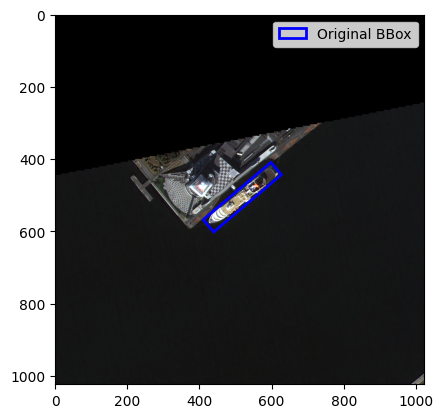

In [19]:
import os
import csv
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import math

# CSV 파일에서 이미지 경로와 JSON 경로를 불러오는 함수
def load_csv(csv_file):
    data = []
    with open(csv_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # 헤더 스킵
        for row in reader:
            img_path, json_path = row
            data.append((img_path, json_path))
    return data
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# JSON 파일에서 imcoords 값과 object_angle 불러오는 함수
def get_imcoords_and_angle_from_json(json_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    imcoords = None
    object_angle = 0
    if 'features' in data:
        for feature in data['features']:
            if 'properties' in feature and 'object_imcoords' in feature['properties']:
                imcoords = feature['properties']['object_imcoords']
                object_angle = feature['properties'].get('object_angle', 0.0)  # 각도 값도 추출
                break  # 첫 번째 객체만 사용
    
    return imcoords, object_angle

# imcoords 좌표를 다각형으로 변환하는 함수 (회전 없이 그대로 사용)
def get_original_coords(imcoords):
    coords = list(map(float, imcoords.split(',')))
    x_coords = coords[0::2]  # 짝수 인덱스는 x 좌표
    y_coords = coords[1::2]  # 홀수 인덱스는 y 좌표
    original_coords = list(zip(x_coords, y_coords))  # (x, y) 형태로 묶음
    return original_coords

# 바운딩 박스를 이미지 위에 그리기
def visualize_image_with_bbox(image_path, original_coords):
    image = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # 원래의 바운딩 박스 그리기 (파란색)
    original_polygon = patches.Polygon(original_coords, linewidth=2, edgecolor='b', facecolor='none', label='Original BBox')
    ax.add_patch(original_polygon)

    # 범례 추가
    ax.legend()

    # 이미지와 바운딩 박스 보여주기
    plt.show()

# 사용 예시
csv_file = 'train.csv'  # 이미지 경로와 JSON 경로가 담긴 CSV 파일
data = load_csv(csv_file)

# 첫 번째 이미지와 JSON 파일 처리
img_path, json_path = data[0]

# JSON에서 imcoords와 object_angle 가져오기
imcoords, object_angle = get_imcoords_and_angle_from_json(json_path)

if imcoords:
    # imcoords를 그대로 사용
    original_coords = get_original_coords(imcoords)
    
    # 회전 없이 원본 다각형 바운딩 박스를 시각화
    visualize_image_with_bbox(img_path, original_coords)
else:
    print("imcoords 정보가 없습니다.")


In [22]:
import numpy as np

# imcoords 좌표를 다각형으로 변환하는 함수 (회전된 상태 그대로 사용)
def get_original_coords(imcoords):
    coords = list(map(float, imcoords.split(',')))
    x_coords = np.array(coords[0::2])  # 짝수 인덱스는 x 좌표
    y_coords = np.array(coords[1::2])  # 홀수 인덱스는 y 좌표
    return x_coords, y_coords

# 중심 좌표(cx, cy) 계산
def calculate_center(x_coords, y_coords):
    cx = np.mean(x_coords)
    cy = np.mean(y_coords)
    return cx, cy

# 회전된 상태의 width, height 계산
def calculate_width_height(x_coords, y_coords):
    width = max(x_coords) - min(x_coords)  # x 좌표의 범위 (width)
    height = max(y_coords) - min(y_coords)  # y 좌표의 범위 (height)
    return width, height

# 예시 imcoords (JSON 파일에서 가져온 값이라고 가정)
imcoords = "857.661614, 420.671576, 881.159154, 412.176387, 903.895546, 475.064840, 880.398006, 483.56002"

# 다각형 좌표로 변환
x_coords, y_coords = get_original_coords(imcoords)

# 중심 좌표(cx, cy) 계산
cx, cy = calculate_center(x_coords, y_coords)

# 회전된 상태의 width, height 계산
width, height = calculate_width_height(x_coords, y_coords)

# 결과 출력
print(f"Center (cx, cy): ({cx}, {cy})")
print(f"Width: {width}")
print(f"Height: {height}")


Center (cx, cy): (880.77858, 447.86820575)
Width: 46.23393199999998
Height: 71.38363300000003
